In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
image_file = "images/feedback.jpg"
img = cv2.imread(image_file)

In [23]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    if len(im_data.shape) == 3:
        h, w, d = im_data.shape
    else:
        h, w = im_data.shape

    figsize = w / dpi, h / dpi

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()

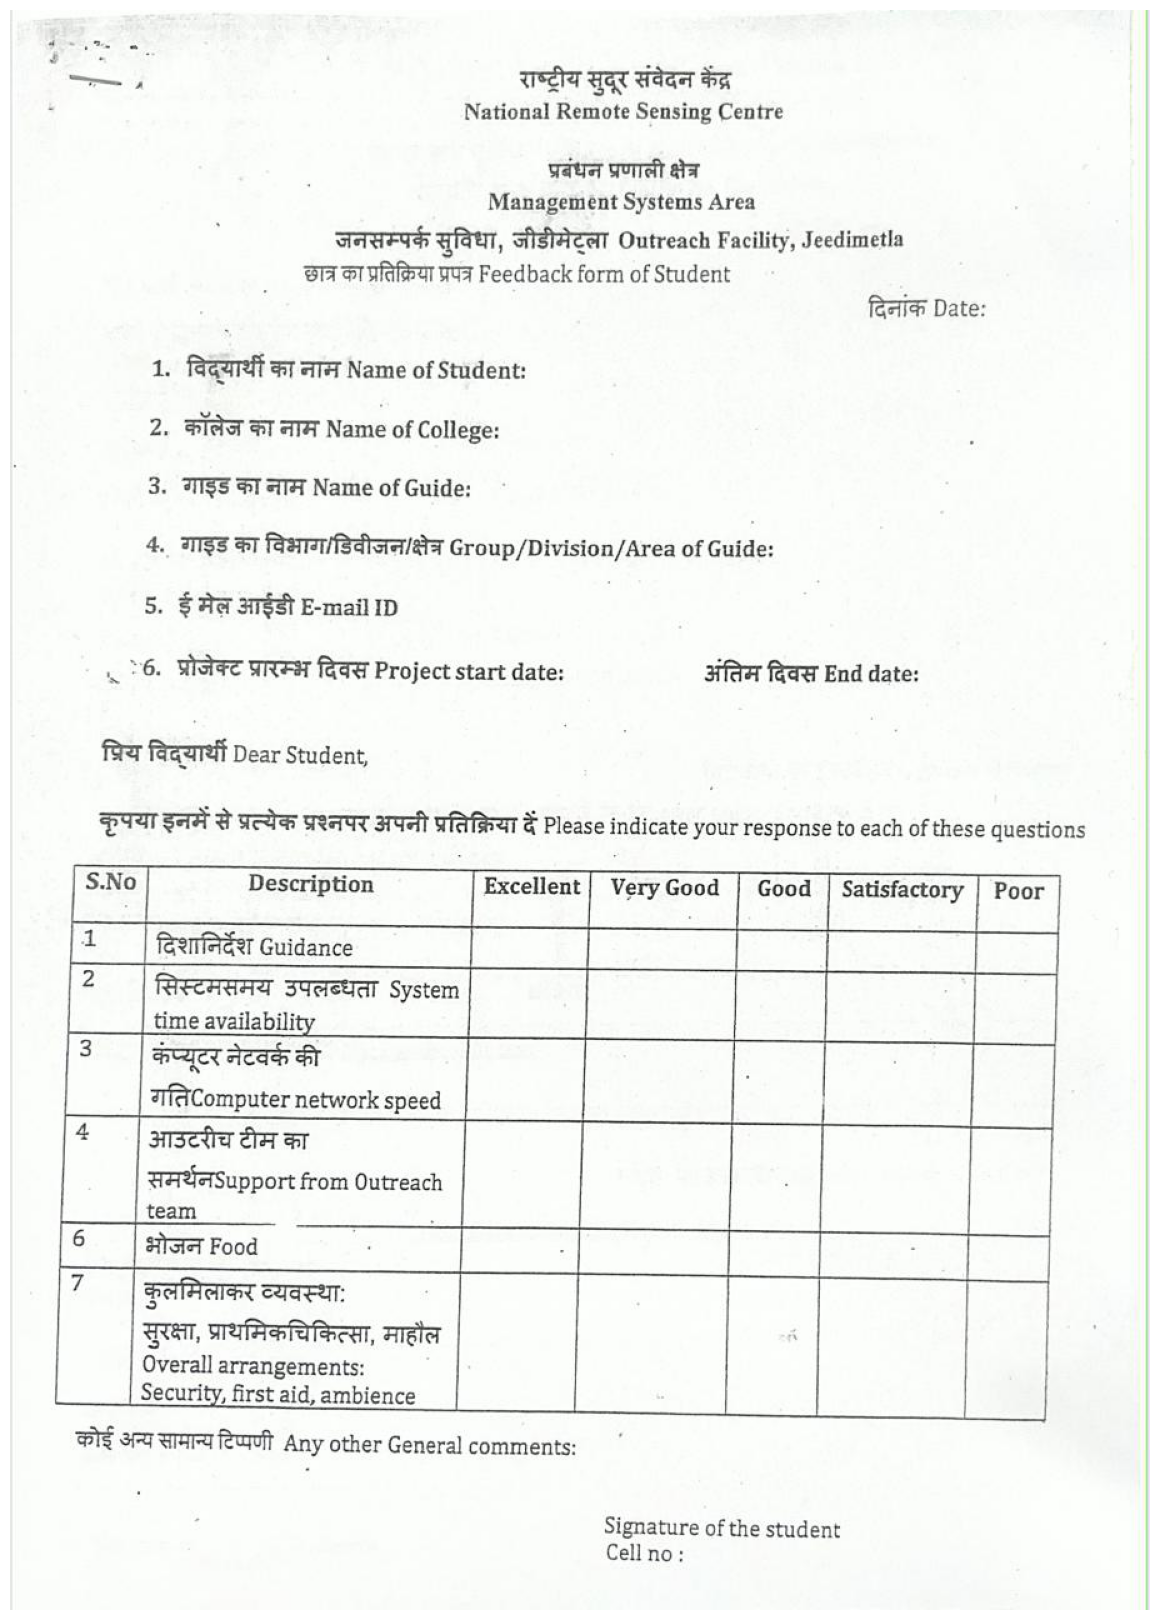

In [24]:
display(image_file)

## Inversion

In [25]:
inverted_img = cv2.bitwise_not(img)
cv2.imwrite("images/inverted.jpg", inverted_img)

True

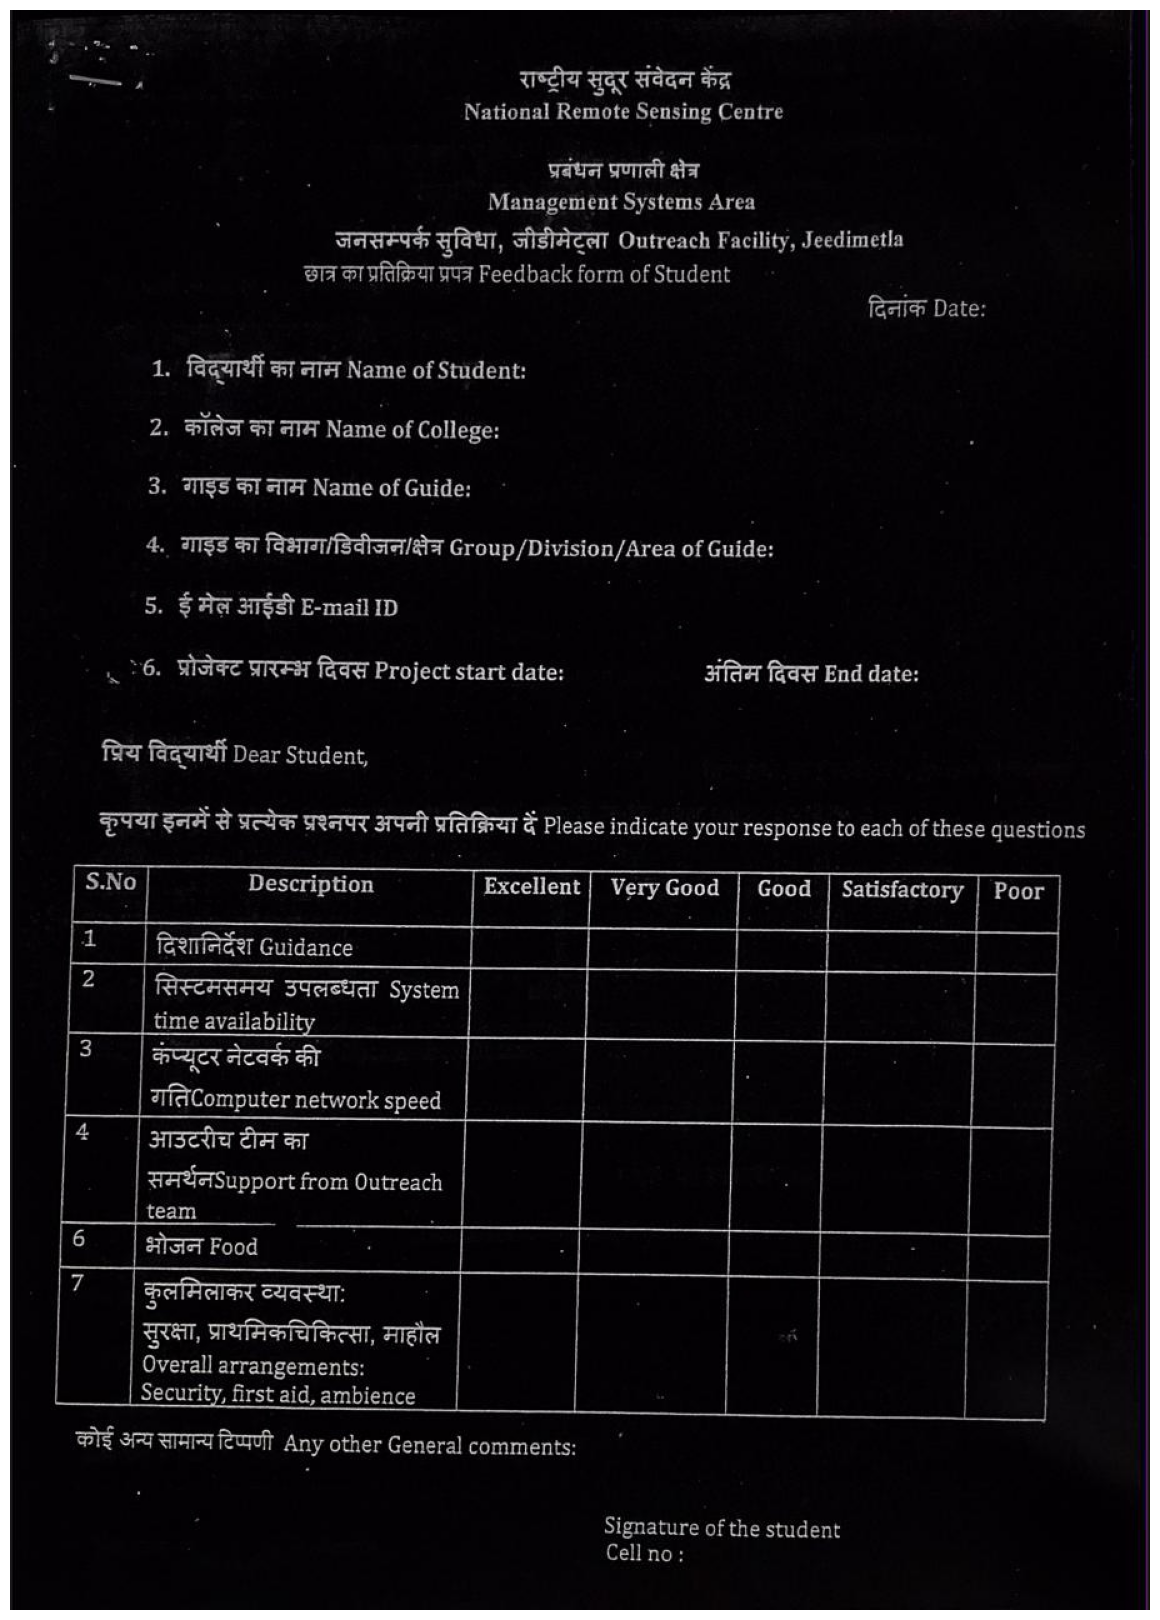

In [26]:
display("images/inverted.jpg")

## Rescaling

## Binarization

In [27]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [28]:
gray_image = grayscale(img)
cv2.imwrite('images/gray.jpg', gray_image)

True

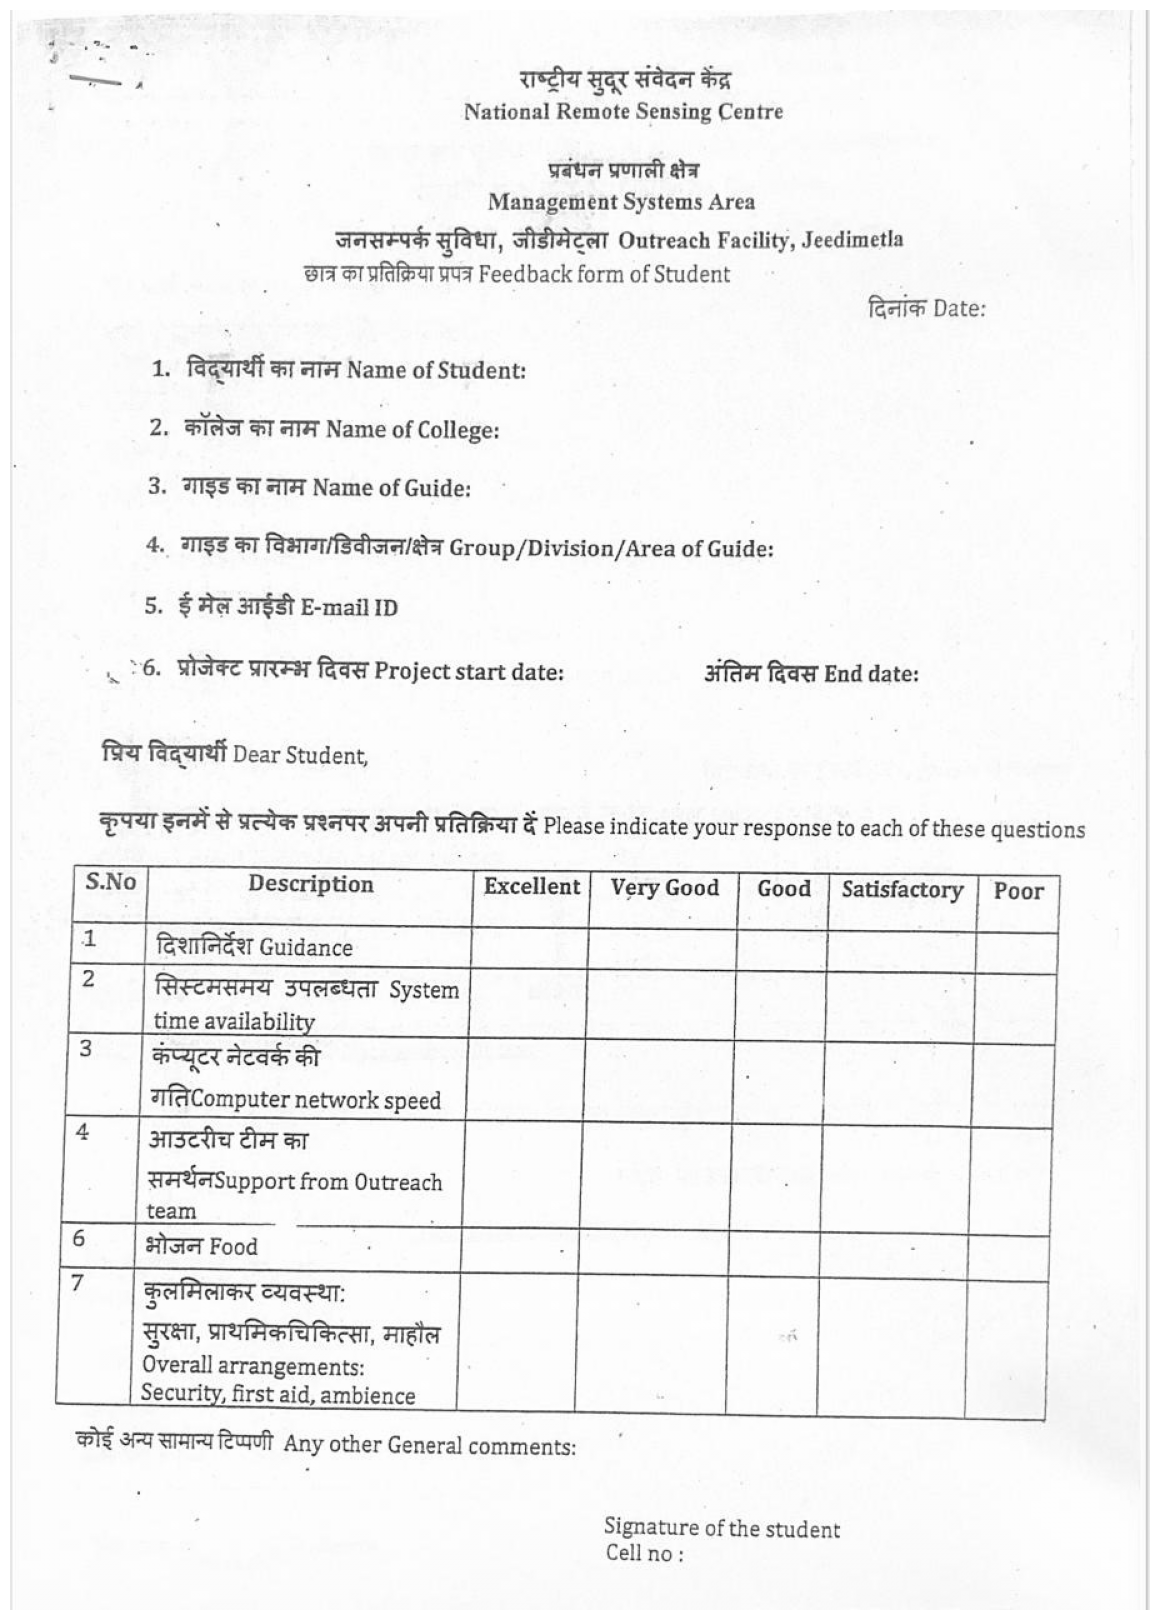

In [29]:
display('images/gray.jpg')

In [109]:
thresh, im_bw = cv2.threshold(gray_image, 190, 230, cv2.THRESH_BINARY)
cv2.imwrite('images/bw_image.jpg', im_bw)

True

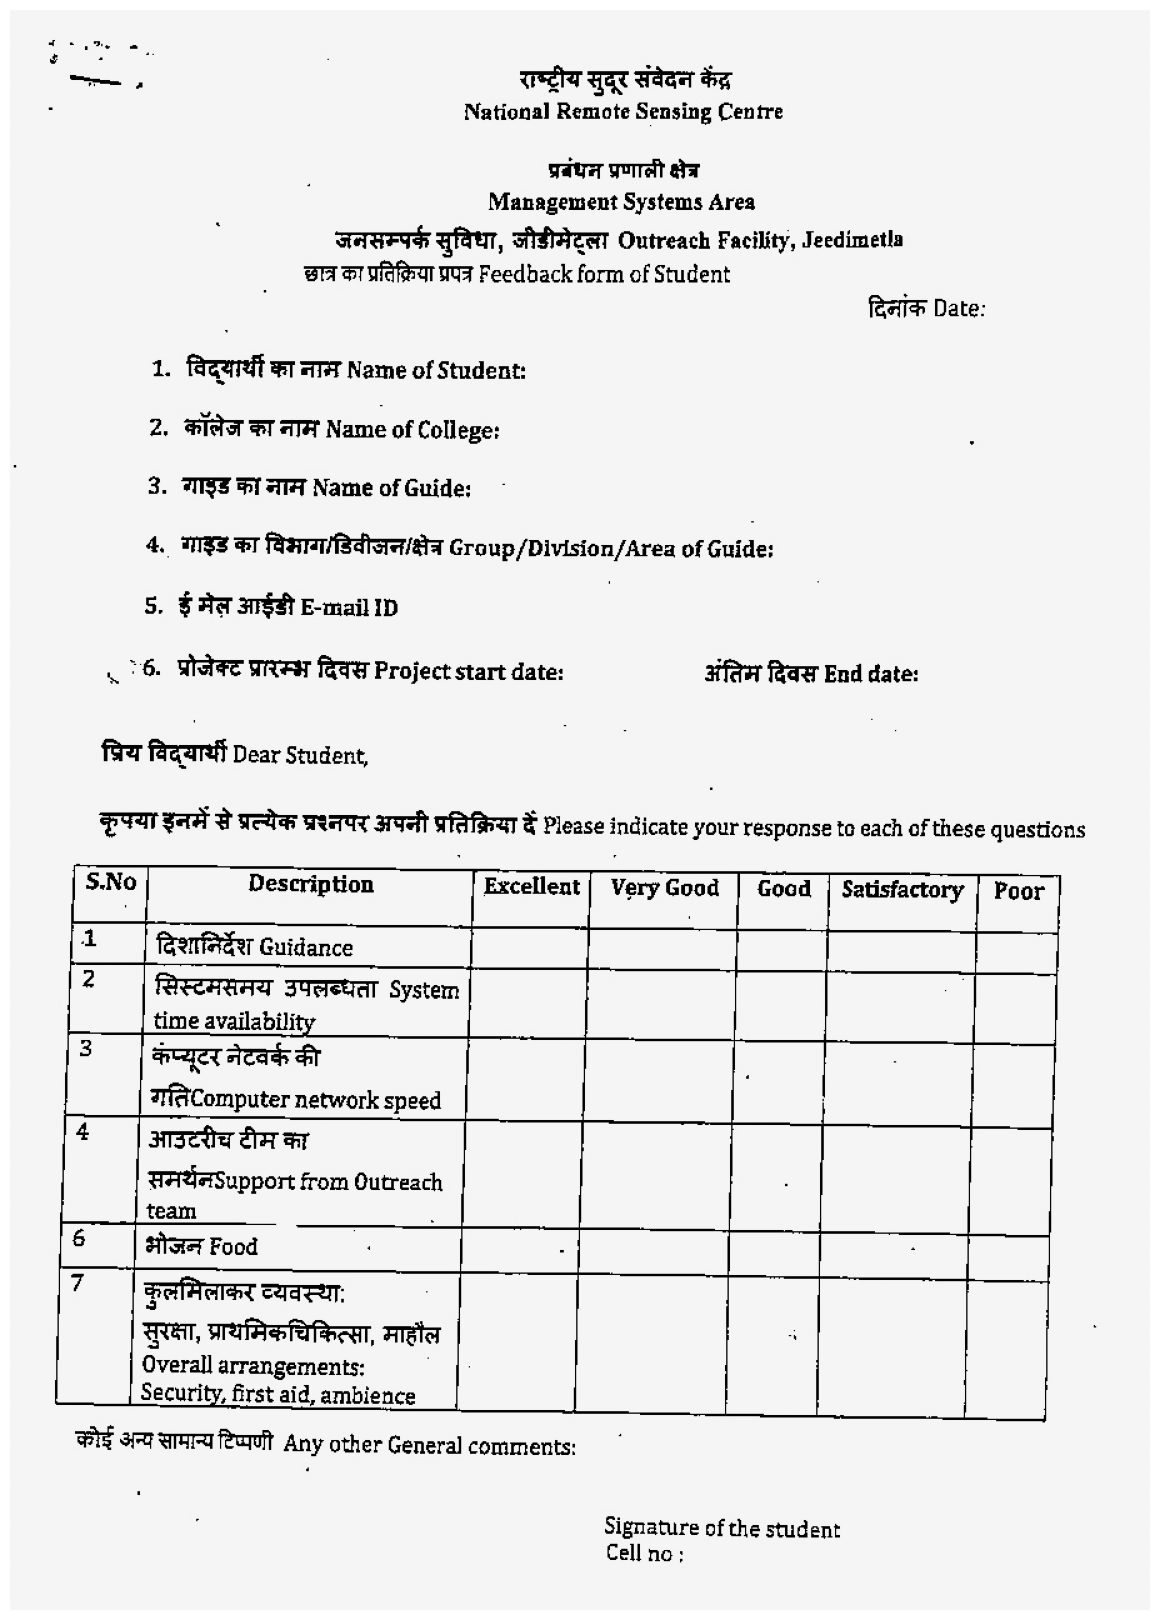

In [110]:
display('images/bw_image.jpg')

## Noise Removal

In [138]:
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return image

In [139]:
no_noise = noise_removal(im_bw)
cv2.imwrite('images/no_noise.jpg', no_noise)

True

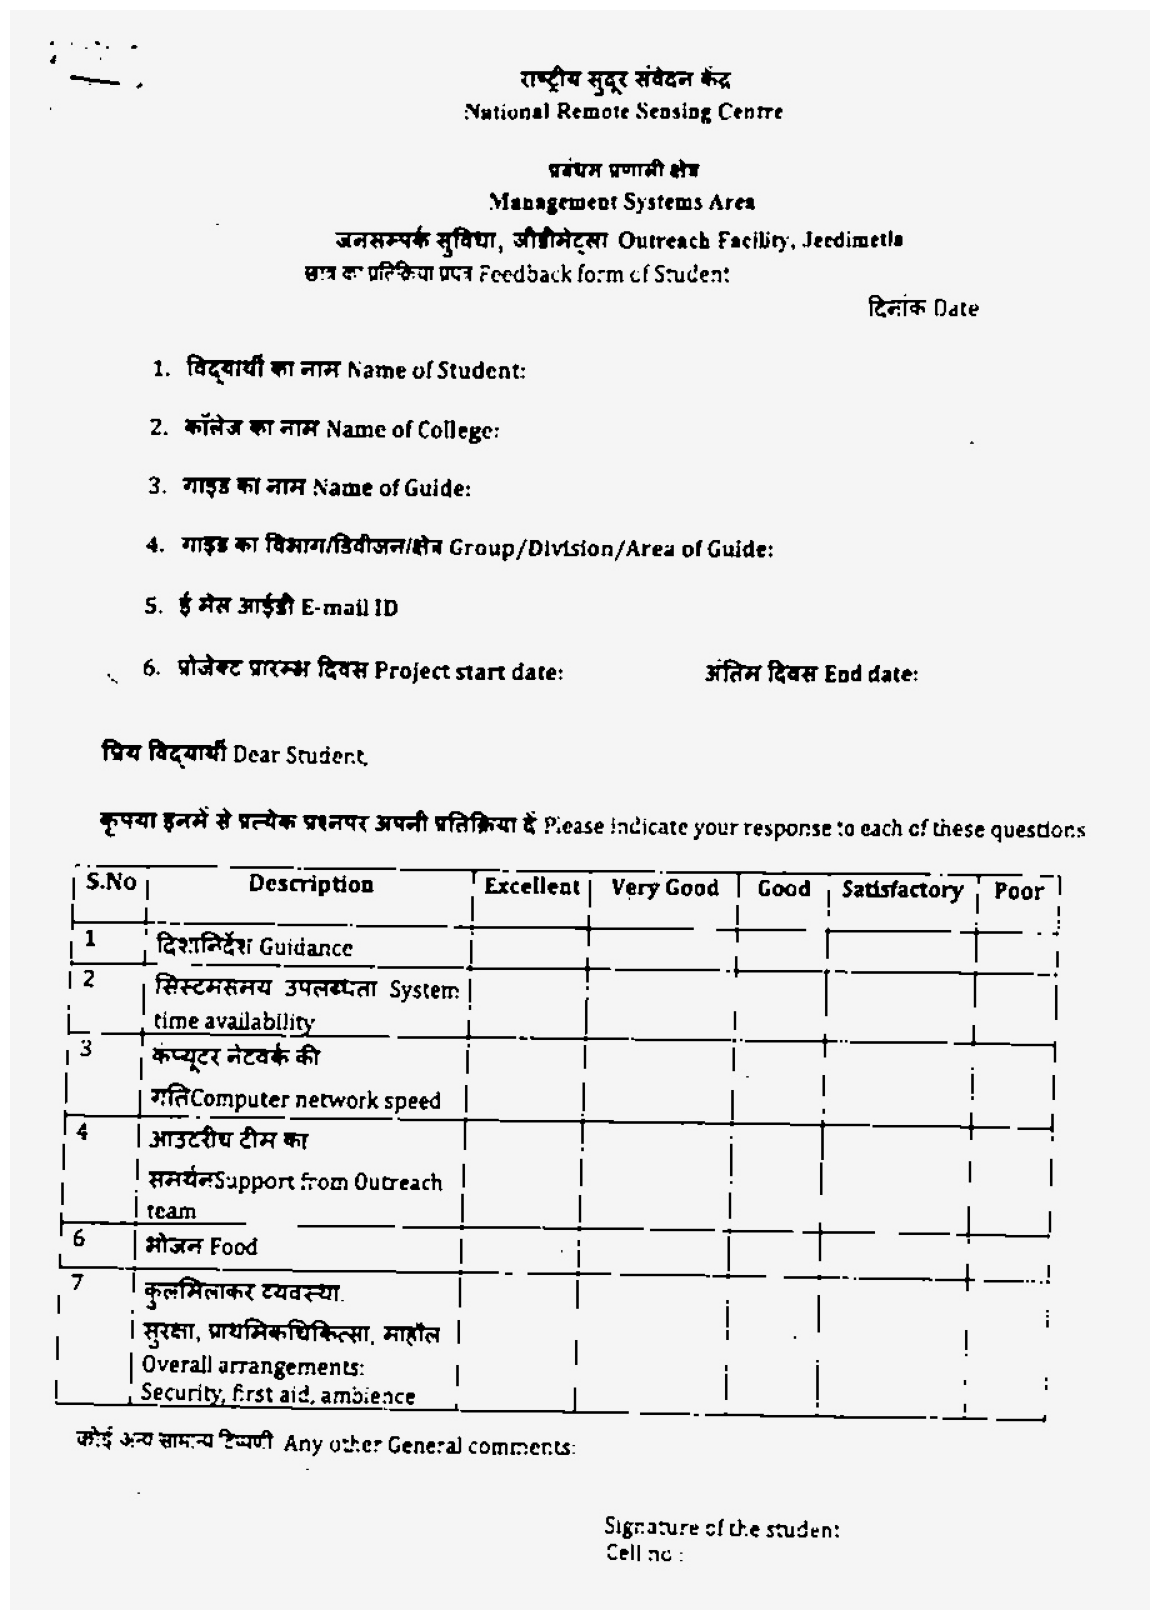

In [140]:
display('images/no_noise.jpg')

In [150]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

In [151]:
eroded_img = thin_font(no_noise)
cv2.imwrite('images/eroded_img.jpg', eroded_img)

True

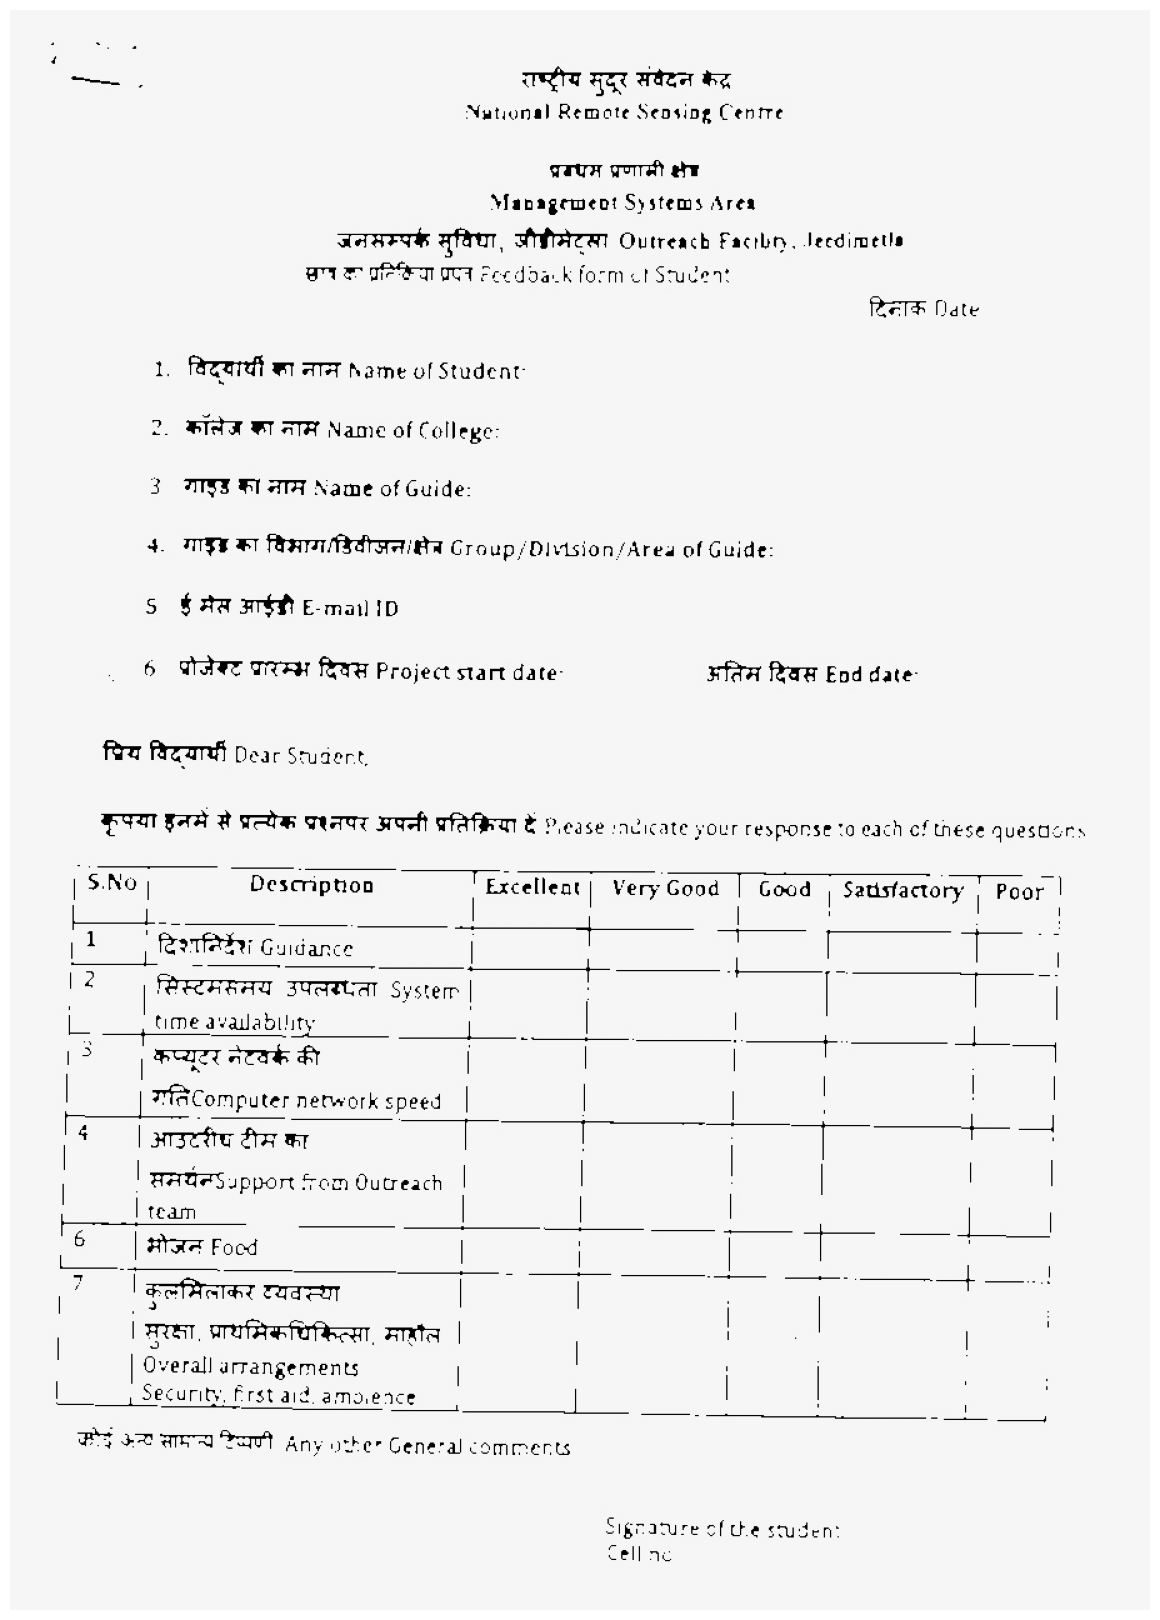

In [152]:
display('images/eroded_img.jpg')

In [165]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

In [166]:
dilated_img = thick_font(no_noise)
cv2.imwrite('images/dilated_img.jpg', dilated_img)

True

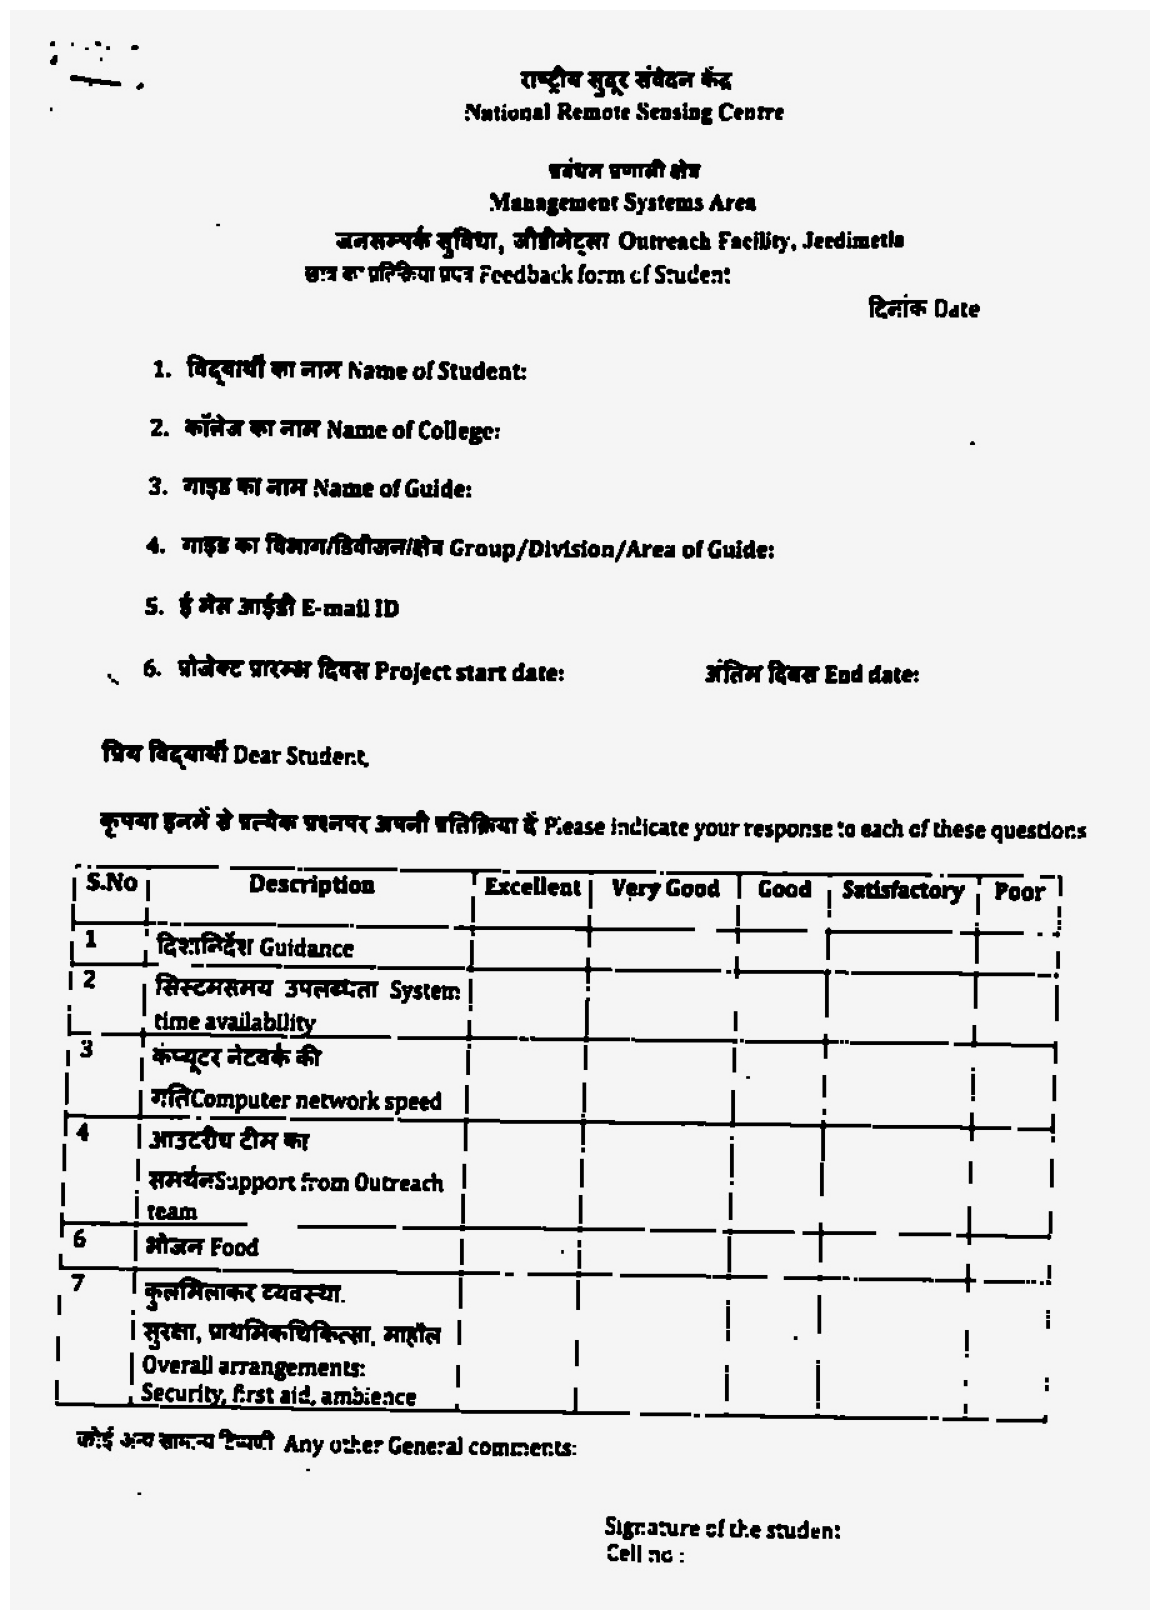

In [167]:
display('images/dilated_img.jpg')

## Rotation

In [168]:
def getSkewAngle(cvImage) -> float:
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations = 2)

    contours, heirarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x, y, w, h = rect
        cv2.rectangle(newImage, (x, y), (x + w, y + h), (0, 255, 0), 2)

    largestContour = contours[0]
    print(len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite('images/boxes.jpg', newImage)
    angle = minAreaRect[-1]
    if angle < -45:
        angle += 90
    return -1.0 * angle

def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [169]:
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [172]:
fixed = deskew(img)
cv2.imwrite('images/rotated.jpg', fixed)

68


True

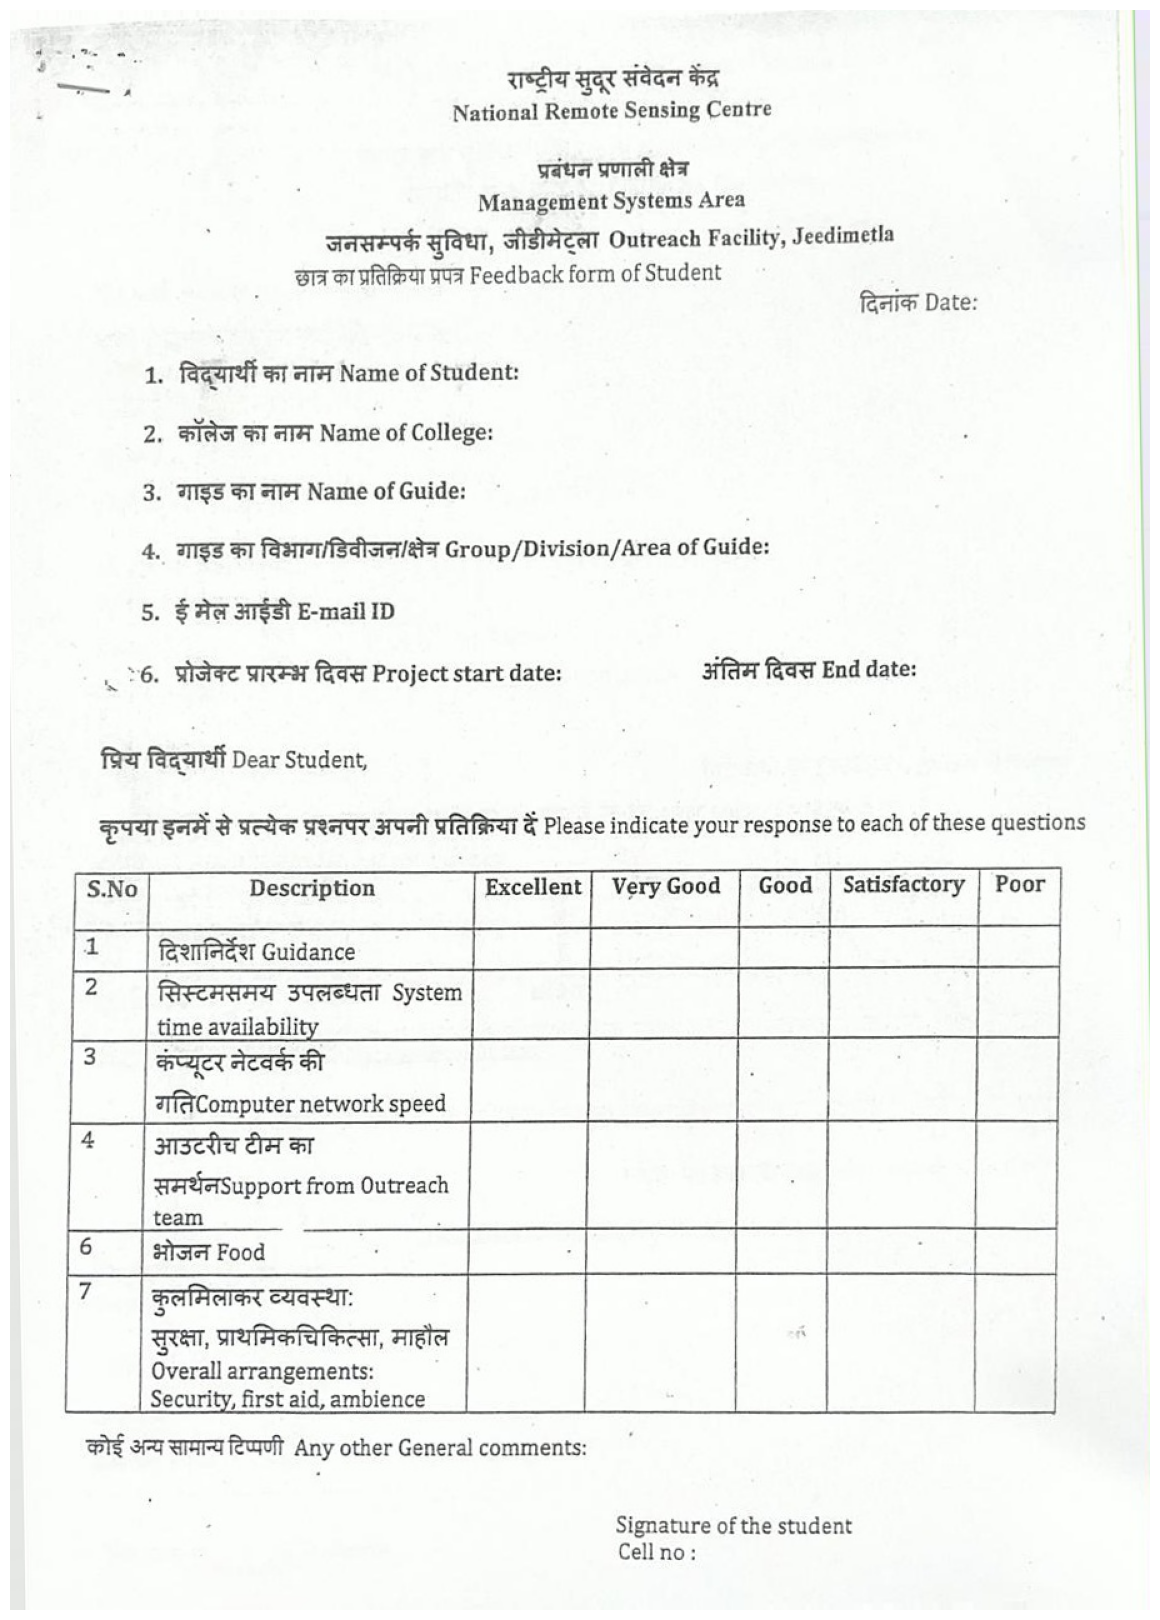

In [173]:
display('images/rotated.jpg')